<h1 align="center">Bank Credit Card Launch: Phase 1</h1>

Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of a bank credit card

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h1 style="color:purple" align="center">Data Import<h1>

### Import Data

In [2]:
df_cust = pd.read_csv('datasets/customers.csv')
df_cs = pd.read_csv('datasets/credit_profiles.csv')
df_trans = pd.read_csv('datasets/transactions.csv')

In [3]:
print("Customers data",df_cust.shape)
print("Credit Score data",df_cs.shape)
print("Transactions data",df_trans.shape)

Customers data (1000, 8)
Credit Score data (1004, 6)
Transactions data (500000, 7)


In [4]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [5]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [6]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


<h1 style="color:purple" align="center">Explore Customers Table<h1>

In [7]:
df_cust.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married


In [8]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


### <h2 style="color:Blue">1. Analyze Income Column<h2>

### Handle Null Values: Annual income

In [9]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

There are 50 null values in annual_income.

In [10]:
df_cust[df_cust.annual_income.isna()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married


We can handle these null values using different ways,

1. **Remove them**: Since there are 50 of them in a dataframe of 1000, we will not remove them as we don't want to loose some important records
1. **Replace them with mean or median**: It is suggested we use median in the case of income. This is because in an income data there could be outliers and median is more robust to these outliers
1. **Replace them with median per occupation**: Occupation wise median income can vary. It is best to use a median per occupation for replacement

In [11]:
occupation_wise_inc_median = df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [12]:
# 2. Replace null values in annual_income with the median income of their occupation group
df_cust['annual_income'] = df_cust.apply(
    lambda row: occupation_wise_inc_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
    axis=1
)

In [13]:
df_cust.iloc[[14,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single


Previously these 2 records had null annual income. Now you have a median value per occupation

In [14]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

Now that there are no null values, let us view the distribution of annual income

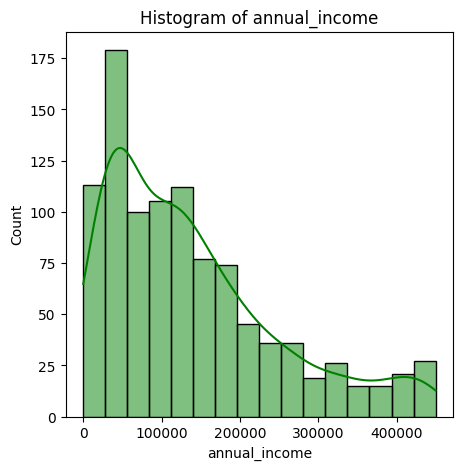

In [15]:
plt.figure(figsize=(5, 5))
sns.histplot(df_cust['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual_income')
plt.show()

**You can see above that the income distribution is right skewed**

In [16]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


#### We have following observations from the above,

1. **Age**: min = 1, max = 135
1. **Annual Income**: min = 2, max = 449 k

Age column has outliers. Annual income also seem to have outliers in terms of minimum value because business suggested that minimum income should be at least 100

### Outlier Detection: Annual income


In [17]:
df_cust.annual_income.describe()

count      1000.000000
mean     138916.765500
std      110969.408643
min           2.000000
25%       48229.500000
50%      113416.000000
75%      192614.000000
max      449346.000000
Name: annual_income, dtype: float64

In [18]:
df_cust['annual_income'].mean(), df_cust['annual_income'].std()

(np.float64(138916.7655), np.float64(110969.4086433663))

In [19]:
lower = df_cust['annual_income'].mean() - 3*df_cust['annual_income'].std()
upper = df_cust['annual_income'].mean() + 3*df_cust['annual_income'].std()

lower, upper

(np.float64(-193991.4604300989), np.float64(471824.9914300989))

In [20]:
df_cust[df_cust['annual_income']>upper]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


Using 3 * standard deviation from mean to check for outliers, there are no records of customers with annual income over the upper limit.

However, the minimum annual income is 2. Assuming our business manager told us that the income should be at least 100. We can use this as our criteria to find out the outliers on the lower end. These outliers could have occured due to a data error.

In [21]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [22]:
df_cust[df_cust.annual_income<100].shape

(10, 8)

### Outlier Treatment: Annual income

Above records (with <100$ income) are outliers. We have following options to treat them,

1. **Remove them**: It is decided not to remove them as these are valid customers and we want to include them in our analysis
1. **Replace them with mean or median** : Mean is sensitive to outliers. It is better to use median for income values
1. **Replace them with occupation wise median**: Income level may vary based on occupation. For example median income for data scientist can be different from a median income of a business owner. It is better to use occupation wise median income for replacement


In [23]:
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [24]:
# Replacing customers with income below 100 with the median based on customer's occupation

# Using iterrows() to iterate through the records
for index, row in df_cust.iterrows():
    if row["annual_income"] < 100:
        occupation = df_cust.at[index, "occupation"]
        df_cust.at[index, "annual_income"] = occupation_wise_inc_median[occupation]

In [25]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [26]:
df_cust.loc[[262, 316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


Record at 262 and 316 location had annual income of < 100$. Now you can see it is replaced by a median income per occupation

### Data Visualization: Annual Income

We will explore average income level based on occupation, gender, location and marital status

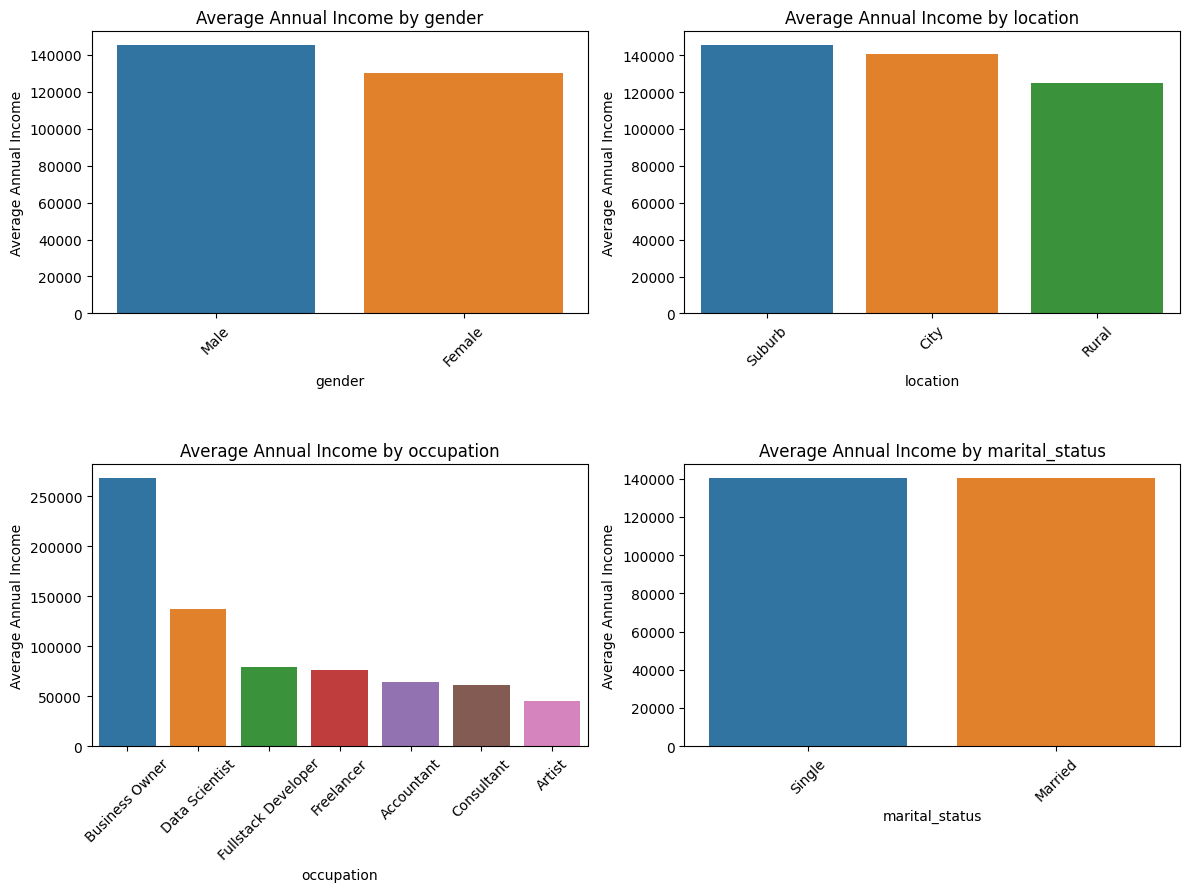

In [27]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

**From above plots, we can tell:**

1. Average income for male is slightly higher compared to female.

2. Average income is roughly the same in Suburbs and City, and lower when in the Rural areas.

3. Average income is highest for Business Owner, followed by Data Scientist, and lowest for Artist. The remaining occupation have similar income.

4. Average income for is roughly the same whether the customer is single or married.

#### <h2 style="color:Blue">2. Analyze Age Column<h2>

### Handle Null Values: Age Column

First let us check if there are any NULL values in the Age column

In [28]:
df_cust.age.isnull().sum()

np.int64(0)

No null values are found in age column. This means we don't need to worry about handling them.

In [29]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

### Outlier Treatment: Age

Data shows that min age is 1 and max age is 135. These seem to be outliers. So let's find out age distribution.

In [30]:
min_age = df_cust.age.min()
max_age = df_cust.age.max()

min_age, max_age

(np.int64(1), np.int64(135))

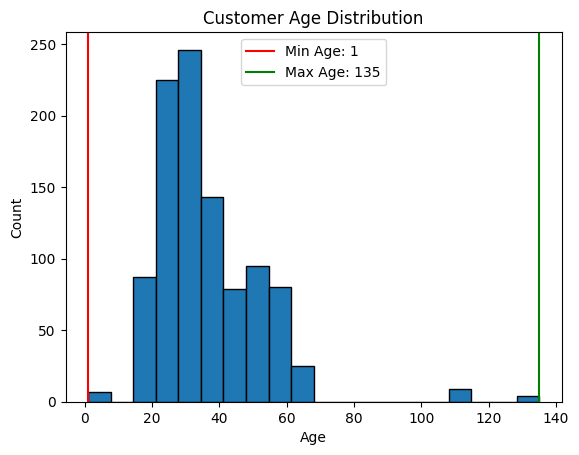

In [31]:
plt.hist(df_cust.age, bins=20, edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")

plt.axvline(min_age, color="red", label=f"Min Age: {min_age}")
plt.axvline(max_age, color="green", label=f"Max Age: {max_age}")

plt.legend()
plt.show()

Assume the customers should have age between 15 and 80. Any age not in this range is assumed to be ouliers

In [32]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [33]:
outliers = df_cust[(df_cust.age<15)|(df_cust.age>80)]
outliers.shape

(20, 8)

Total 20 outliers for age.

Possible options to handle outliers:
1. Remove them: This doesn't sound like a good option as we will loose important information
2. Replace outlier values with some appropriate value: We can use mean or median for this

Instead of replace it with a median age for all customers, let's calculate median age per occupation

In [34]:
outliers.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single


**We will calculate median per occupation and then use that for replacing outliers**

In [35]:
median_age_per_occupation = df_cust.groupby('occupation')['age'].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [36]:
df_cust.age = df_cust.apply(lambda row: round(median_age_per_occupation[row.occupation]) if row.age<15 or row.age>80 else row.age, axis=1)

In [37]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [38]:
df_cust.age.describe()

count    1000.000000
mean       35.544000
std        12.275372
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

Now we don't have any outliers left. min age is 18 and max is 64

#### Data Visualization: Age Column

In [39]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

In [40]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48


In [41]:
df_cust['age_group'].value_counts(normalize=True)*100

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64

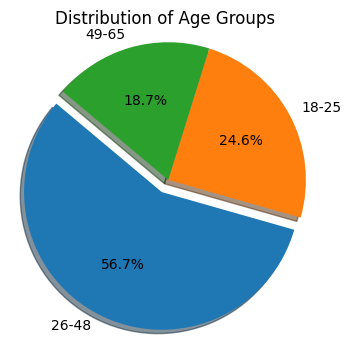

In [42]:
# Calculate the count of values in each age group
age_group_counts = df_cust['age_group'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    explode=(0.1,0,0), 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Groups')
plt.show()

##### More than 50% of customer base are in in age group of 26 - 48, and around 25% are of age group 18 - 25

### <h2 style="color:Blue">3. Analyze Gender and Location Distribution<h2>

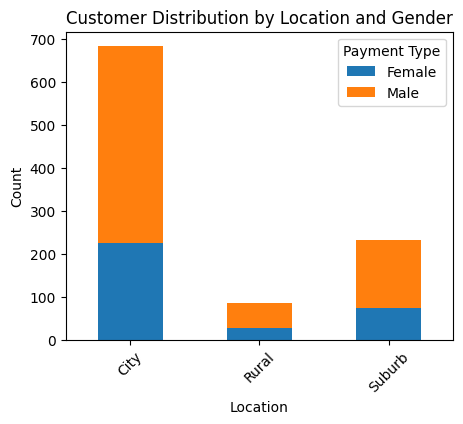

In [43]:
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize the distribution of payment types for each occupation
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')

# Show the bar chart
plt.legend(title='Payment Type', bbox_to_anchor=(1, 1))  # Add a legend

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

City area have the most customers.

Suburbs area have less than half of the customers in City area.

Rural area have the least customers.

### <h1 style="color:purple" align="center">Explore Credit Score Table<h1>

In [44]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


### Data Cleaning Step 1: Remove Duplicates 

In [45]:
df_cs.shape

(1004, 6)

There are 1004 rows in this dataframe whereas customers dataframe had only 1000. There might be invalid or duplicate data in df_cs

In [46]:
# Checking number of unique cust_id in df_cs
df_cs['cust_id'].nunique()

1000

In [47]:
# Displaying duplicated records
df_cs[df_cs.duplicated('cust_id', keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [48]:
df_cs.drop_duplicates(subset='cust_id', keep="last",inplace=True)

In [49]:
df_cs.shape

(1000, 6)

In [50]:
df_cs[df_cs.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


All duplicates have been cleaned.
Next step would be to see if there are any null values

### Data Cleaning Step 2: Handle Null Values

In [51]:
df_cs.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

There are 65 null values for credit limit.

From the business knowledge we know that credit limit depends on credit score of a customer. We will try to find out if we can figure out a mathematical relationship between credit score and credit limit and use credit score to full NULL values in credit limit.

In [52]:
df_cs[df_cs.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [53]:
df_cs['credit_limit'].unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

Credit limit has only few unique values. Let's check the count for each of these unique values

In [54]:
df_cs['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

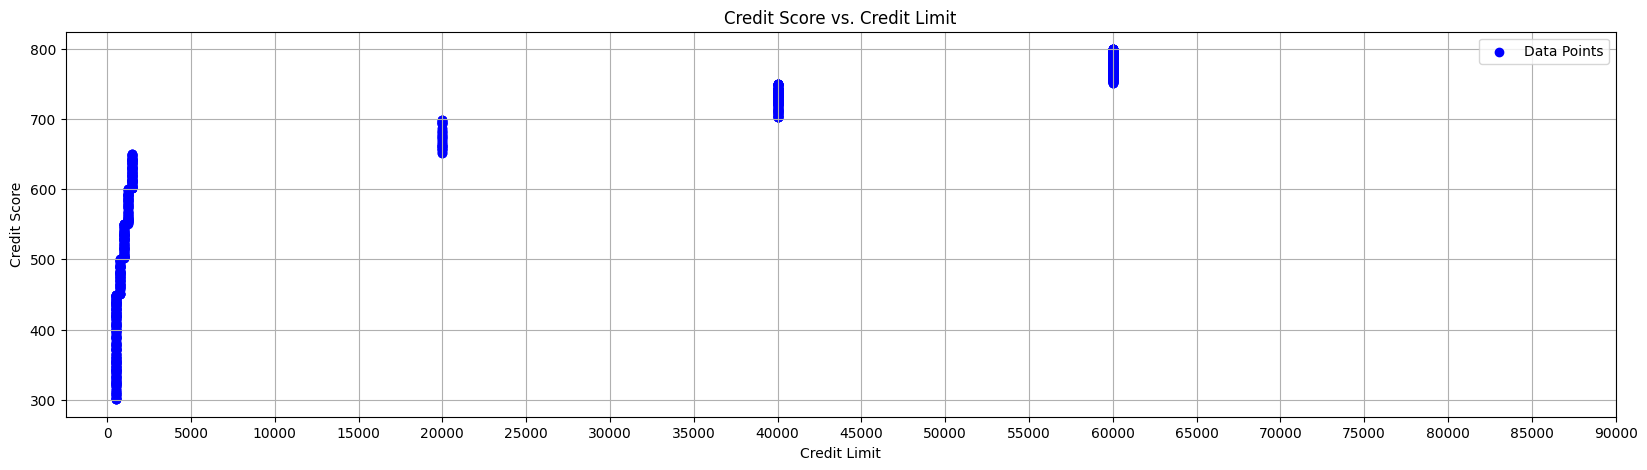

In [55]:
# Looking at scatter plot for credit score vs credit_limit again (after handling oultiers)
# Create a scatter plot
plt.figure(figsize=(20, 5))
plt.scatter(df_cs['credit_limit'], df_cs['credit_score'], c='blue', marker='o', label='Data Points')

# Customize the plot
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

# Adjust the y-axis bin interval to 1000
plt.xticks(range(0, 90001, 5000))
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

Here we can see clear relationship between credit score and credit limit. 

There seems to be levels for credit limit. For example, up to 650 score is getting a very minor credit limit (<1000$) where as a score between 650 to 700 is getting around 20000. Score between 700 to 750 is getting around 40K etc.

In [56]:
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

df_cs['credit_score_range'] = pd.cut(df_cs['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

In [57]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


We can now see a new column called credit_score_range which is calculated based on the credit_score column

In [58]:
df_cs[df_cs['credit_score_range']=="750-799"].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
21,22,785,0.897089,36083.0,3.0,60000.0,750-799
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
26,27,766,0.830908,31344.0,3.0,60000.0,750-799
29,30,798,0.222597,7238.0,2.0,60000.0,750-799
31,32,768,0.747793,35109.0,2.0,60000.0,750-799


In [59]:
df_cs[df_cs['credit_score_range']=="300-449"].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
5,6,442,0.705409,246.0,4.0,500.0,300-449
11,12,429,0.627645,263.0,0.0,500.0,300-449
15,16,347,0.531660,190.0,0.0,500.0,300-449
18,19,447,0.795650,292.0,1.0,500.0,300-449
20,21,381,0.714710,307.0,0.0,500.0,300-449


Above you can see that for credit score range "750-799" the credit limit is 60K whereas for "300-449" it is 500. We can use MODE function to find out most frequently occuring credit limit for a given score range.

In [60]:
crange_mode = df_cs.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
crange_mode

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [61]:
df_cs[df_cs.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
562,562,507,0.592631,409.0,4.0,NaN,500-549
64,65,734,0.473715,13631.0,0.0,NaN,700-749
159,160,709,0.759795,18244.0,0.0,NaN,700-749


In [62]:
# Merge the mode values back with the original DataFrame
df_cs = pd.merge(df_cs,crange_mode, on='credit_score_range', suffixes=('','_mode'))
df_cs.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
619,620,506,0.278525,184.0,3.0,1000.0,500-549,1000.0
893,894,680,0.816764,10301.0,2.0,20000.0,650-699,20000.0
223,224,741,0.108221,3784.0,4.0,40000.0,700-749,40000.0


In [63]:
df_cs[df_cs.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
898,899,775,0.487290,21548.0,0.0,NaN,750-799,60000.0
159,160,709,0.759795,18244.0,0.0,NaN,700-749,40000.0
676,677,300,0.785509,341.0,1.0,NaN,300-449,500.0


Above we can replace NaN value in credit_limit column with credit_limit_mode value. This value indicates most frequently occuring credit limit for a given credit_score_range. Hence it can be used as a replacement value.

In [64]:
df_cs.credit_limit.fillna(df_cs.credit_limit_mode, inplace=True)

In [65]:
df_cs[df_cs.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


You can now see ZERO outliers in credit_limit column which means we successfully got rid of all NULL values. Hurray! 🥳

In [66]:
df_cs[df_cs.cust_id==277]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
276,277,781,0.459545,24618.0,1.0,60000.0,750-799,60000.0


### Data Cleaning Step 3: Handle Outliers: outstanding_debt

In [67]:
df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


When we observe min and max for various columns, we realize that outstanding_debt's max is greater than the max of credit_limit. Based on the business understanding, we know that the maximum debt that a customer can have is equal to credit limit. They would not be allowed to spend more than their credit limit. Let's see how many such cases are present in our dataset

**Visualizing outliers**

Text(0.5, 1.0, 'Box plot for outstanding debt')

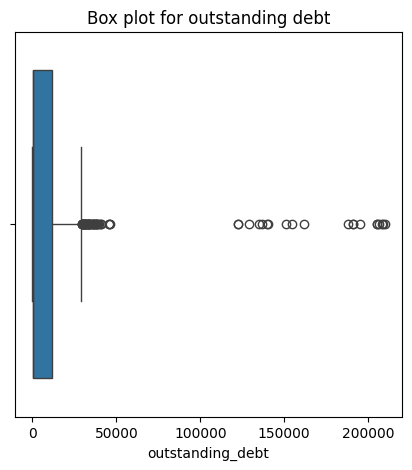

In [68]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df_cs['outstanding_debt'])
plt.title('Box plot for outstanding debt')

Instead of using any statistical approach (such as standard deviation or IQR), here too we will use a business knowledge. We will mark any outstanding debt that is greater than credit limit as an outlier

In [69]:
df_cs[df_cs.outstanding_debt>df_cs.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [70]:
df_cs.loc[df_cs['outstanding_debt'] > df_cs['credit_limit'], 'outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
544    135112.0
636    140063.0
646    128818.0
698    190717.0
723    140008.0
725    205404.0
730    209901.0
766    195004.0
862    208406.0
Name: outstanding_debt, dtype: float64

In [71]:
df_cs.loc[df_cs['outstanding_debt'] > df_cs['credit_limit'], 'outstanding_debt'] = df_cs['credit_limit']

In [72]:
df_cs.loc[[766,862]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
766,767,473,0.611750,750.0,1.0,750.0,450-499,750.0
862,863,792,0.399555,60000.0,3.0,60000.0,750-799,60000.0


In [73]:
df_cs[df_cs.outstanding_debt>df_cs.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


All outliers in column outstanding_debt are now gone

In [74]:
df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,6850.084000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,10683.473561,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,541.500000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.00000,60000.000000


### Data Exploration: Visualizing Correlation in Credit Score Table

In [75]:
df_cust.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48


In [76]:
df_cs.head(2)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0


In [77]:
df_merged = df_cust.merge(df_cs, on='cust_id', how='inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [78]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444870
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027598
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444223
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510891
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.618965
age,0.444870,-0.027598,0.444223,0.510891,0.618965,1.000000


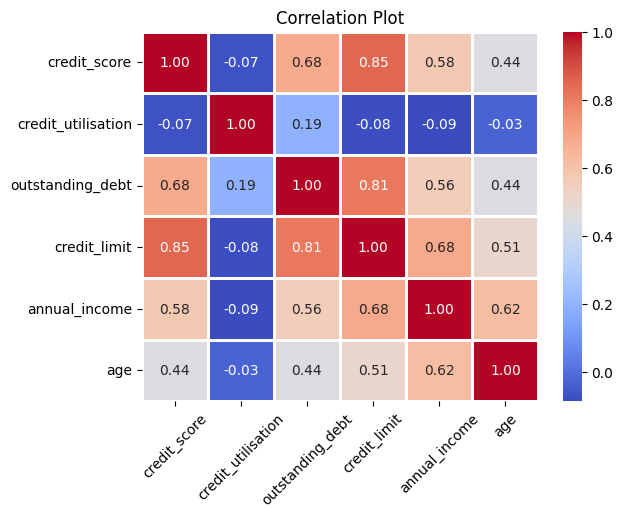

In [79]:
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Plot')
plt.xticks(rotation=45)
plt.show()

You can see a high correlation between credit limit and credit score (~0.85)

Also credit limit and annual income has a high correlation.

This correlation table can be used for further analysis. It shows if one variable has relationship with the other variable

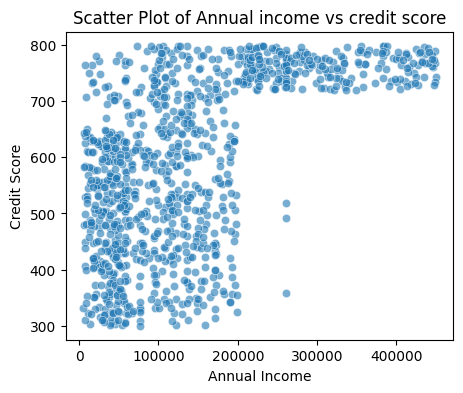

In [80]:
# Just looking if there is any relation between annual_income and credit score
plt.figure(figsize=(5, 4))
sns.scatterplot(x='annual_income', y='credit_score', data=df_merged, alpha=0.6)
plt.title('Scatter Plot of Annual income vs credit score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

##### No clear pattern observed

### <h1 style="color:purple" align="center">Transactions Table<h1>

In [81]:
df_trans.head(2)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card


In [82]:
df_trans.shape

(500000, 7)

### Data Cleaning Step 1: Handle NULL Values: platform column

In [83]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

Platform has a lot of null values.

In [84]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


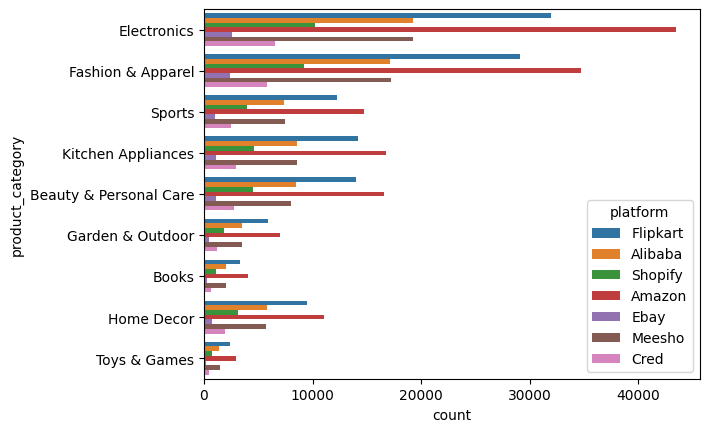

In [85]:
sns.countplot(y='product_category', hue='platform', data=df_trans)
plt.show()

In the above chart, you can see that in all product categories Amazon is the platform that is used the most for making purchases. For handling null values in platform may be we can just replace them using "Amazon" as a product platform just because it is used most frequently

In [86]:
df_trans.platform.mode()[0]

'Amazon'

In [87]:
df_trans['platform'].fillna(df_trans.platform.mode()[0], inplace=True)

In [88]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

Once again we got rid of NULL values 🥳🎄🎈🎈

### Data Cleaning Step 2: Treat Outliers: tran_amount

In [89]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


We can see transactions with 0 amount. These seem to be invalid

In [90]:
df_trans_zero = df_trans[df_trans.tran_amount==0]
df_trans_zero.sample(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
250603,250604,587,2023-05-05,0,Amazon,Electronics,Credit Card
467474,467475,260,2023-08-20,0,Amazon,Electronics,Credit Card
58174,58175,479,2023-01-29,0,Amazon,Electronics,Credit Card


In [91]:
df_trans_zero.shape

(4734, 7)

In [92]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [93]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

It appears that for all zero transactions, the platform = Amazon, product_category = Eletronics and payment_type = Credit Card. 

We need to find other transactions in this group and find its median to replace these zero values. 
We are not using mean because we can see some outliers as well in this column.

In [94]:
df_trans_1 = df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=="Electronics")&(df_trans.payment_type=="Credit Card")]
df_trans_1.shape

(15637, 7)

In [95]:
df_trans_1[df_trans_1.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [96]:
median_to_replace = df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

np.float64(554.0)

In [97]:
df_trans['tran_amount'].replace(0,median_to_replace, inplace=True)

In [98]:
df_trans[df_trans.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


As you can see above, no zero values are left in tran_amount column

In [99]:
df_trans.tran_amount.describe()

count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

In [100]:
Q1, Q3 = df_trans['tran_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

lower, upper

(-628.0, 1107.0)

In [101]:
df_trans[df_trans.tran_amount<upper].tran_amount.max()

np.int64(999)

In [102]:
df_trans[df_trans.tran_amount>upper].tran_amount.min()

np.int64(50000)

In [103]:
df_trans_outliers = df_trans[df_trans.tran_amount>=upper]
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [104]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [105]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [106]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [107]:
df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

In [108]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


Outliers from the tran_amount have been replaced with the mean as per product category.

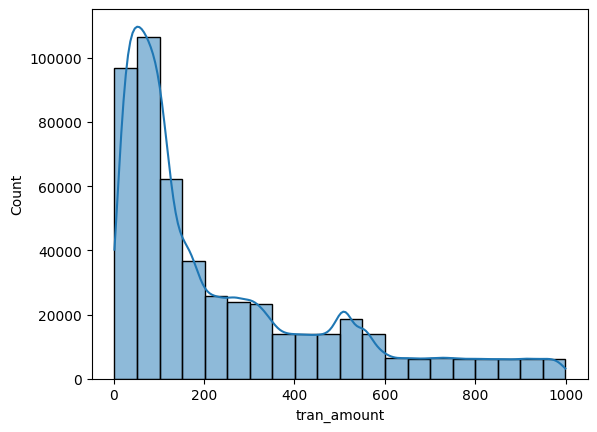

In [109]:
sns.histplot(x='tran_amount', data=df_trans, bins=20, kde=True)
plt.show()

Above shows the histogram of transactions after the removal of outliers. You can see that distribution is right skewed. Transaction amount now is less than 1000

### Data Visualization: Payment Type Distribution and Age Group

In [110]:
df_trans.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe


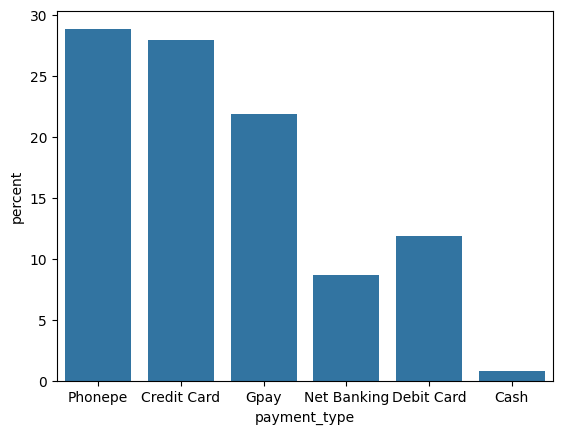

In [111]:
sns.countplot(x=df_trans.payment_type, stat='percent')
plt.show()

**Distribution of payment types across age groups**

In [112]:
df_merged_all = df_merged.merge(df_trans, on='cust_id', how='inner')
df_merged_all.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


In [113]:
df_merged_all.shape

(500000, 22)

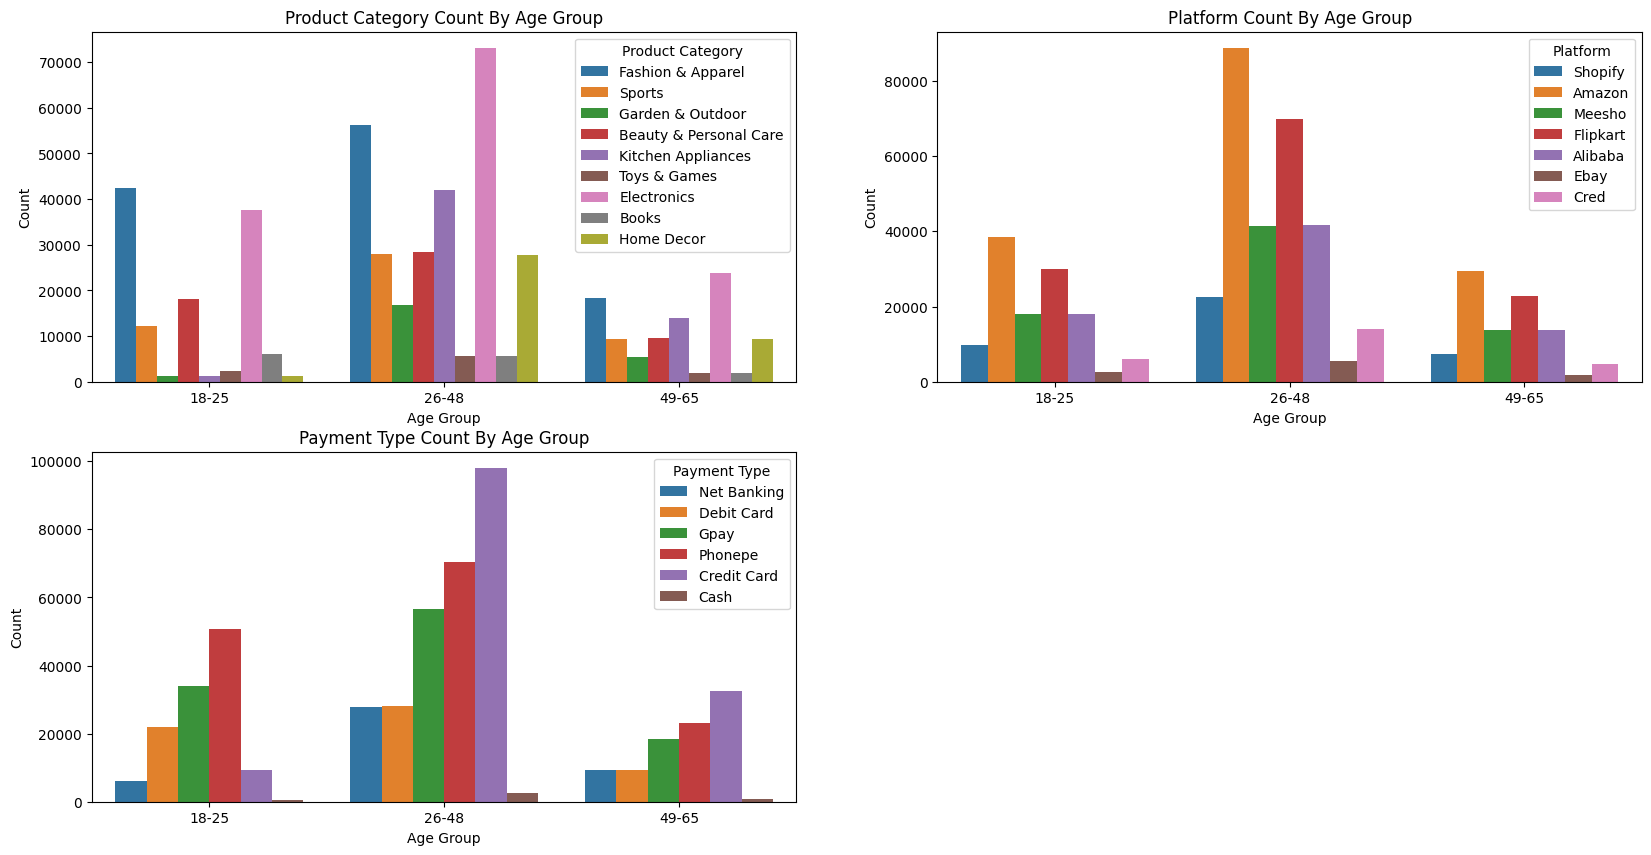

In [114]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# First plot - top left
sns.countplot(x='age_group', hue="product_category", data=df_merged_all, ax=axes[0, 0])
axes[0, 0].set_title("Product Category Count By Age Group")
axes[0, 0].set_xlabel("Age Group")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title="Product Category", loc='upper right')

# Second plot - top right
sns.countplot(x='age_group', hue="platform", data=df_merged_all, ax=axes[0, 1])
axes[0, 1].set_title("Platform Count By Age Group")
axes[0, 1].set_xlabel("Age Group")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title="Platform", loc='upper right')

# Third plot - bottom left
sns.countplot(x='age_group', hue="payment_type", data=df_merged_all, ax=axes[1, 0])
axes[1, 0].set_title("Payment Type Count By Age Group")
axes[1, 0].set_xlabel("Age Group")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title="Payment Type", loc='upper right')

# Remove the empty subplot (bottom right)
fig.delaxes(axes[1, 1])


plt.show()


#### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
2. Top platforms : Amazon, Flipkart, Alibaba
3. Age group 18-25 has less exposure to credit cards compared to other groups

### Data Visualization: Average Transaction Amount

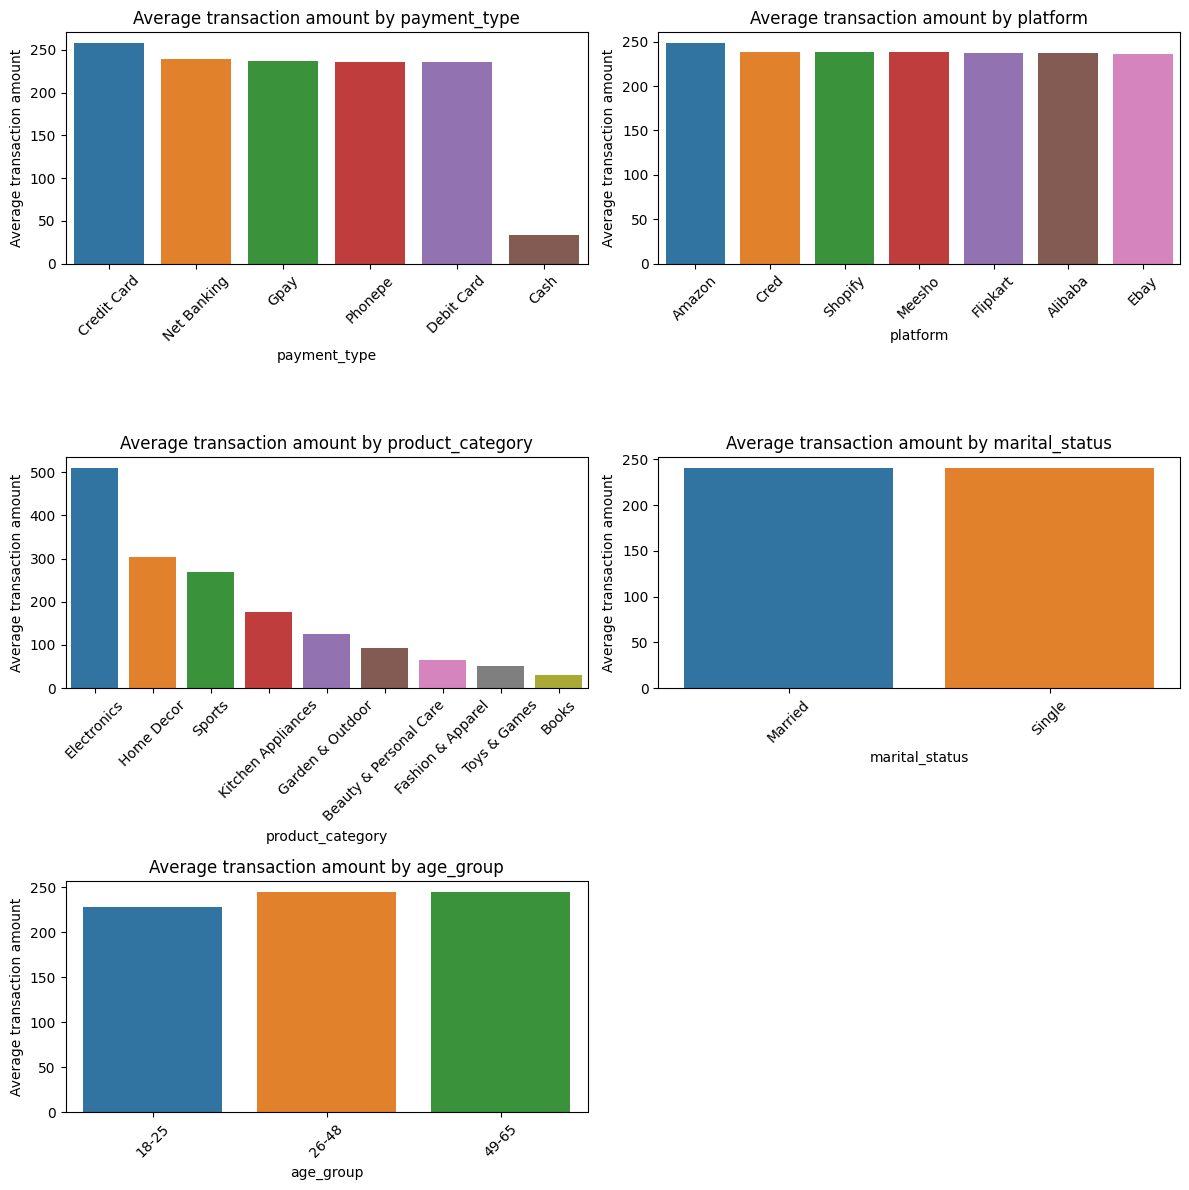

In [115]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average tran_amount for each category
    avg_tran_amount_by_category = df_merged_all.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by tran_amount before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

### Further Analysis On Age Group

Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [116]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.846561,597.569665
2,49-65,260165.925134,41699.197861,701.524064


In [117]:
age_group_metrics.columns

Index(['age_group', 'annual_income', 'credit_limit', 'credit_score'], dtype='object')

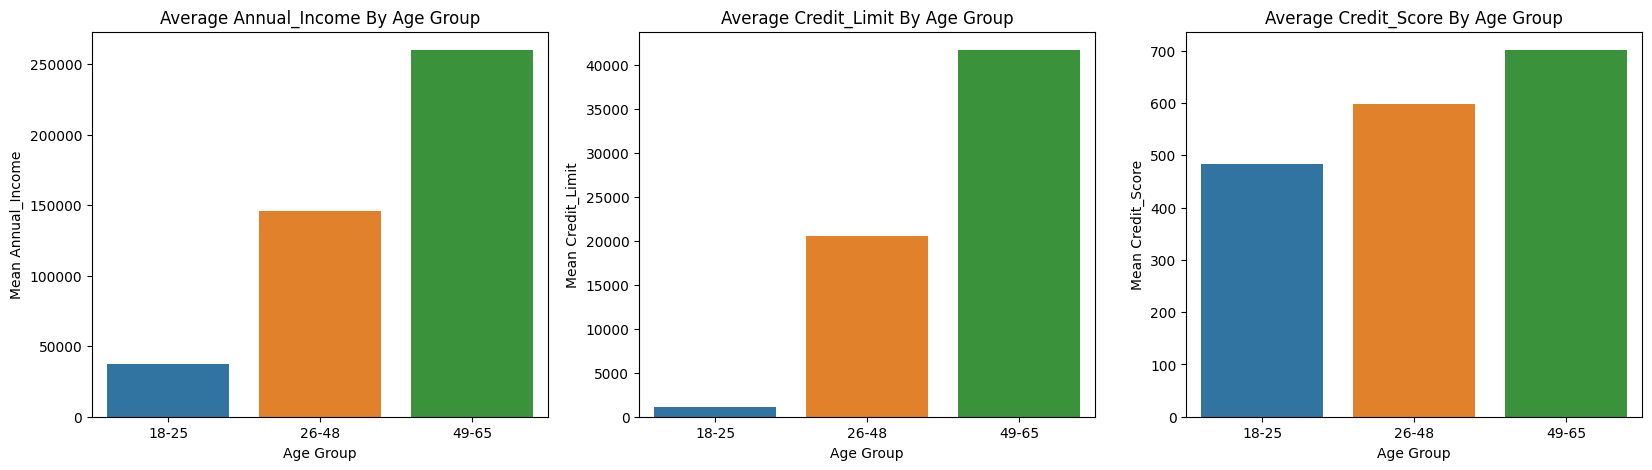

In [118]:
fig, axes = plt.subplots(1,3, figsize=(20,5))

for i, col in enumerate(age_group_metrics.columns[1:]):
    sns.barplot(x='age_group', y=col, data=age_group_metrics, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average {col} by age group'.title())
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel(f'Mean {col.title()}')

### <h2 align="center" style="color:purple">Finalize Target Market For a Trial Credit Card Launch</h2>

#### Targeting Untapped market

<div style="text-align: center;">
  <img src="analysis.png" alt="Analysis Image" style="width:500px;">
</div>

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care